## Test splitting data by sampling

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random

## Make unevenly distributed data
make test data and show graph

In [3]:
uneven_distribution = np.concatenate([
    np.random.uniform(0,100, [4000]),
    np.random.uniform(0,10, [3000]),
    np.random.uniform(15,20, [1000]),
    np.random.uniform(50,90, [1000]),
    np.random.uniform(30,40, [1000]),
])

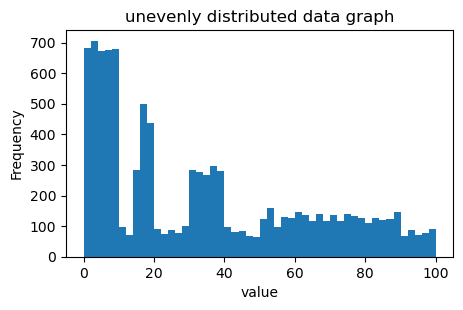

In [4]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})

plt.hist(uneven_distribution, bins=50)
plt.gca().set(title='unevenly distributed data graph', ylabel='Frequency', xlabel='value');

## Spliting the test data on spark way
split the test data into 5 partition in same interval

In [5]:
lowerBound = min(uneven_distribution)
upperBound = max(uneven_distribution)
numPartitions = 5

stride = (upperBound - lowerBound) / numPartitions
partitions = []

for i in range(numPartitions):
    if i == 0:
        left = lowerBound
    else:
        left = i * stride
    
    if i == numPartitions - 1:
        right = upperBound
    else :
        right = (i + 1) * stride
    partitions.append(len([e for e in uneven_distribution if left <= e <= right]))

    
print("ideal partition size : 2000")
print("real partition size: " + ', '.join(str(e) for e in partitions))

ideal partition size : 2000
real partition size: 4805, 1831, 1035, 1304, 1025


## Spliting the test data on sampling
split the test data into 5 partition in sampling 

In [6]:
def sampling(numSamples):
    numPartitions = 5
    numTotal = len(uneven_distribution)
    samples = sorted(np.random.choice(uneven_distribution, numSamples))

    numBetweenPartition = int(numSamples / numPartitions)
    partitionPoints = []

    for i in range(numBetweenPartition, numSamples, numBetweenPartition):
        partitionPoints.append(samples[i])

    partitions = []
    pointLen = len(partitionPoints)
    for i in range(pointLen + 1):
        if i == 0:
            partitions.append(len([e for e in uneven_distribution if e <= partitionPoints[i]]))
        elif i == pointLen:
            partitions.append(len([e for e in uneven_distribution if partitionPoints[i - 1] < e]))
        else:
            partitions.append(len([e for e in uneven_distribution if partitionPoints[i - 1] < e <= partitionPoints[i]]))

    return partitions
    
                 
print("ideal partition size : 2000")
print("partition size when sample size is 30: " + ', '.join(str(e) for e in sampling(30)))
print("partition size when sample size is 300: " + ', '.join(str(e) for e in sampling(300)))
print("partition size when sample size is 1000: " + ', '.join(str(e) for e in sampling(1000)))

ideal partition size : 2000
partition size when sample size is 30: 1686, 4280, 1716, 783, 1535
partition size when sample size is 300: 2267, 2169, 1957, 1434, 2173
partition size when sample size is 1000: 2046, 1951, 1884, 2073, 2046


In [7]:
partitions_30samples = []
for i in range(30):
    partitions_30samples += sampling(30)
    
partitions_300samples = []
for i in range(30):
    partitions_300samples += sampling(300)

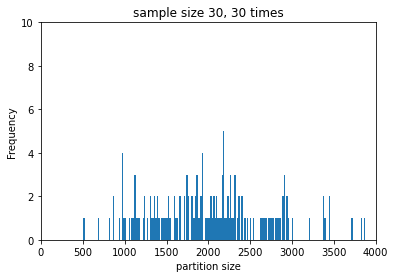

In [27]:
%matplotlib inline

plt.hist(partitions_30samples, bins=200)
plt.xlim([0, 4000])
plt.ylim([0,10])
plt.gca().set(title='sample size 30, 30 times', ylabel='Frequency', xlabel='partition size');

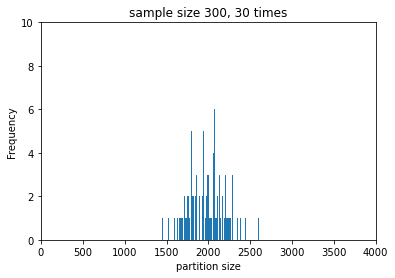

In [28]:
%matplotlib inline

plt.hist(partitions_300samples, bins=200)
plt.xlim([0, 4000])
plt.ylim([0,10])
plt.gca().set(title='sample size 300, 30 times', ylabel='Frequency', xlabel='partition size');

# Conclusion
Spliting the test data in spark way is not work when data is unevenly distributed. However, spliting in sampling work well. Especially, the larger the sample size, the more closer to ideal partition size. 